In [70]:
import matplotlib.pyplot as plt
import numpy as np
from metpy.plots import colortables
from mpl_toolkits.basemap import Basemap
import xarray as xr
from wrf import to_np, getvar, get_basemap, latlon_coords, interplevel, smooth2d
from netCDF4 import Dataset

In [71]:
#setup the colorbar for dBZ
cmap = colortables.get_colortable('NWSReflectivity')
levels = [0,10,20,30,40,50,60,70,80]

In [72]:
#open the gridrad datasets
ds0 = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/nexrad_3d_v4_0_20170121T030000Z.nc', decode_cf=True)
ds1 = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/nexrad_3d_v4_0_20170121T090000Z.nc', decode_cf=True)
ds2 = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/nexrad_3d_v4_0_20170121T150000Z.nc', decode_cf=True)
ds3 = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/nexrad_3d_v4_0_20170121T210000Z.nc', decode_cf=True)
ds4 = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/nexrad_3d_v4_0_20170122T030000Z.nc', decode_cf=True)
ds5 = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/nexrad_3d_v4_0_20170122T090000Z.nc', decode_cf=True)
ds6 = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/nexrad_3d_v4_0_20170122T150000Z.nc', decode_cf=True)
ds7 = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/nexrad_3d_v4_0_20170122T210000Z.nc', decode_cf=True)
ds8 = xr.open_dataset('/glade/work/molina/DATA/jan2017_synoptic/nexrad_3d_v4_0_20170123T030000Z.nc', decode_cf=True)

In [73]:
#extract dBZ at 2-km height as numpy arrays
ds0_ZH = ds0.ZH.sel(time='2017-01-21T03:00:00', Altitude=2.0).values
ds1_ZH = ds1.ZH.sel(time='2017-01-21T09:00:00', Altitude=2.0).values
ds2_ZH = ds2.ZH.sel(time='2017-01-21T15:00:00', Altitude=2.0).values
ds3_ZH = ds3.ZH.sel(time='2017-01-21T21:00:00', Altitude=2.0).values
ds4_ZH = ds4.ZH.sel(time='2017-01-22T03:00:00', Altitude=2.0).values
ds5_ZH = ds5.ZH.sel(time='2017-01-22T09:00:00', Altitude=2.0).values
ds6_ZH = ds6.ZH.sel(time='2017-01-22T15:00:00', Altitude=2.0).values
ds7_ZH = ds7.ZH.sel(time='2017-01-22T21:00:00', Altitude=2.0).values
ds8_ZH = ds8.ZH.sel(time='2017-01-23T03:00:00', Altitude=2.0).values

In [74]:
file1_wrf_d02 = f"/glade/scratch/molina/wrfout_d01_2017-01-21_09:00:00"

ncfile12_wrf_d02 = Dataset(file1_wrf_d02)
bleh = getvar(ncfile12_wrf_d02,"td2")

thecropper1 = 200
thecropper2 = 0

lats4, lons4 = latlon_coords(bleh[thecropper1:,thecropper2:])
m = get_basemap(bleh[thecropper1:,thecropper2:])

In [75]:
#grab lats and lons and convert to basemap coords
lats = ds1.coords['Latitude'].values
lons = ds1.coords['Longitude'].values

#llcrnrlon = -98
#llcrnrlat = 25
#urcrnrlon = -75
#urcrnrlat = 37

#m = Basemap(projection='lcc', lat_0 = 39, lon_0 = -92.5, lat_1 = 40,
#            llcrnrlon = llcrnrlon, llcrnrlat = llcrnrlat,
#            urcrnrlat = urcrnrlat, urcrnrlon = urcrnrlon,
#            resolution='l')

lon, lat = m(*np.meshgrid(lons, lats))

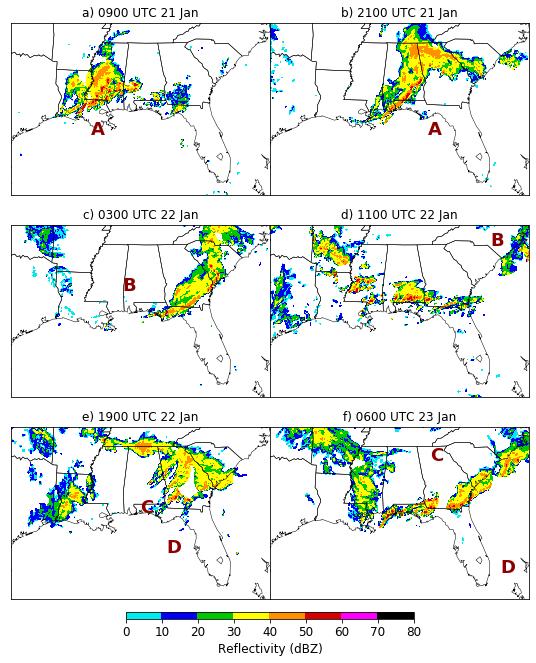

In [33]:
xmin, ymin = m(-97, 24)
xmax, ymax = m(-76, 36)

##############################################################################  
##############################################################################  
##############################################################################  

fig = plt.figure(figsize=(8., 9.5))

##############################################################################  

ax = fig.add_axes([0.05, 0.65, 0.45, 0.33])
    
cs = m.contourf(lon, lat, ds1_ZH, levels=levels,
                cmap=cmap, vmin=0, vmax=80)

m.drawcoastlines(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)
#m.drawparallels(np.arange(int(25.),int(41.),5),labels=[1,0,0,0], linewidth=0.0, fontsize=12, textcolor='k')

ax.text(0.31, 0.35, 'A', color='darkred', fontsize=18, fontweight='bold', transform=ax.transAxes)

ax.set_title('a) 0900 UTC 21 Jan', fontsize=12)

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])


##############################################################################  

ax2 = fig.add_axes([0.5, 0.65, 0.45, 0.33])

cs = m.contourf(lon, lat, ds2_ZH, levels=levels,
                cmap=cmap, vmin=0, vmax=80)

m.drawcoastlines(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)

ax2.text(0.61, 0.35, 'A', color='darkred', fontsize=18, fontweight='bold', transform=ax2.transAxes)

ax2.set_title('b) 2100 UTC 21 Jan', fontsize=12)

ax2.set_xlim([xmin, xmax])
ax2.set_ylim([ymin, ymax])

    
##############################################################################  

ax3 = fig.add_axes([0.05, 0.355, 0.45, 0.33])
   
cs = m.contourf(lon, lat, ds3_ZH, levels=levels,
                cmap=cmap, vmin=0, vmax=80)

m.drawcoastlines(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)
#m.drawparallels(np.arange(int(25.),int(41.),5),labels=[1,0,0,0], linewidth=0.0, fontsize=12, textcolor='k')

ax3.text(0.43, 0.62, 'B', color='darkred', fontsize=18, fontweight='bold', transform=ax3.transAxes)

ax3.set_title('c) 0300 UTC 22 Jan', fontsize=12)

ax3.set_xlim([xmin, xmax])
ax3.set_ylim([ymin, ymax])

    
##############################################################################  

ax4 = fig.add_axes([0.5, 0.355, 0.45, 0.33])

cs = m.contourf(lon, lat, ds4_ZH, levels=levels,
                cmap=cmap, vmin=0, vmax=80)

m.drawcoastlines(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)

ax4.text(0.85, 0.88, 'B', color='darkred', fontsize=18, fontweight='bold', transform=ax4.transAxes)

ax4.set_title('d) 1100 UTC 22 Jan', fontsize=12)
    
ax4.set_xlim([xmin, xmax])
ax4.set_ylim([ymin, ymax])

    
##############################################################################  

ax5 = fig.add_axes([0.05, 0.06, 0.45, 0.33])

cs = m.contourf(lon, lat, ds5_ZH, levels=levels,
                cmap=cmap, vmin=0, vmax=80)

m.drawcoastlines(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)
#m.drawparallels(np.arange(int(25.),int(41.),5),labels=[1,0,0,0], linewidth=0.0, fontsize=12, textcolor='k')
#m.drawmeridians(np.arange(int(-100.),int(-79.),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12, textcolor='k')

ax5.text(0.5, 0.5, 'C', color='darkred', fontsize=18, fontweight='bold', transform=ax5.transAxes)
ax5.text(0.6, 0.27, 'D', color='darkred', fontsize=18, fontweight='bold', transform=ax5.transAxes)

ax5.set_title('e) 1900 UTC 22 Jan', fontsize=12)

ax5.set_xlim([xmin, xmax])
ax5.set_ylim([ymin, ymax])

    
##############################################################################  

ax6 = fig.add_axes([0.5, 0.06, 0.45, 0.33])
 
cs = m.contourf(lon, lat, ds6_ZH, levels=levels,
                cmap=cmap, vmin=0, vmax=80)

m.drawcoastlines(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)
#m.drawmeridians(np.arange(int(-100.),int(-79.),10),labels=[0,0,0,1], linewidth=0.0, fontsize=12, textcolor='k')

ax6.text(0.62, 0.8, 'C', color='darkred', fontsize=18, fontweight='bold', transform=ax6.transAxes)
ax6.text(0.89, 0.15, 'D', color='darkred', fontsize=18, fontweight='bold', transform=ax6.transAxes)

ax6.set_title('f) 0600 UTC 23 Jan', fontsize=12)

ax6.set_xlim([xmin, xmax])
ax6.set_ylim([ymin, ymax])


##############################################################################  

cbar_ax = fig.add_axes([0.25, 0.07, 0.5, 0.01])

ticks_1 = [0,10.,20.,30.,40.,50.,60.,70.,80.]
cbar = fig.colorbar(cs, cax=cbar_ax, ticks=ticks_1[:], orientation='horizontal', extend='max')
cbar.ax.set_xticklabels(['0','10','20','30','40','50','60','70','80'])
cbar.ax.tick_params(labelsize=12)

cbar.set_label(r'Reflectivity (dBZ)', fontsize=12) 

##############################################################################  


#plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig4.png', dpi=1200)
#plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig4_lowdpi.png', dpi=200)
plt.show()
plt.close()

##############################################################################  
##############################################################################  
##############################################################################  

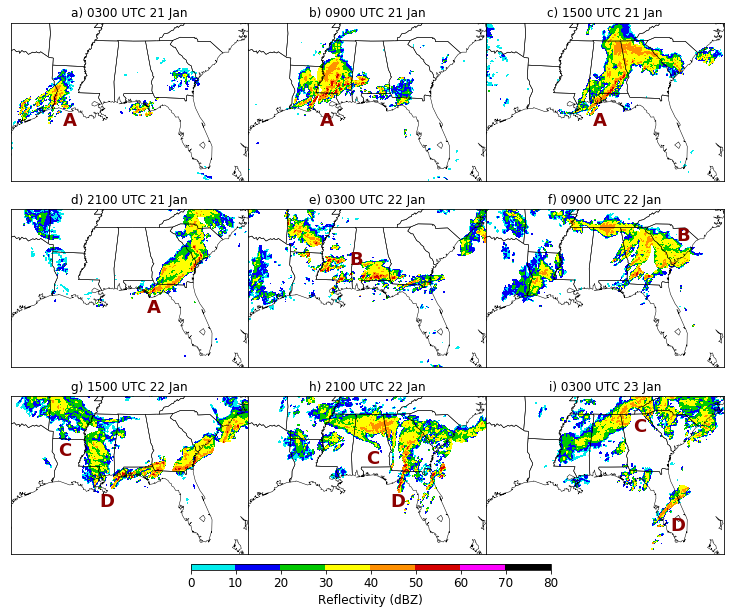

In [76]:
xmin, ymin = m(-97, 24)
xmax, ymax = m(-76, 36)


#########################################################################################
#########################################################################################
#########################################################################################


fig = plt.figure(figsize=(10.,8.5))


##############################################################################  


ax1 = fig.add_axes([0.0, 0.66, 0.33, 0.33])

cs = m.contourf(lon, lat, ds0_ZH, levels=levels,
                cmap=cmap, vmin=0, vmax=80)

m.drawcoastlines(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)

ax1.text(0.22, 0.35, 'A', color='darkred', fontsize=18, fontweight='bold', transform=ax1.transAxes)

ax1.set_title('a) 0300 UTC 21 Jan', fontsize=12)

ax1.set_xlim([xmin, xmax])
ax1.set_ylim([ymin, ymax])


##############################################################################  


ax2 = fig.add_axes([0.33, 0.66, 0.33, 0.33])

cs = m.contourf(lon, lat, ds1_ZH, levels=levels,
                cmap=cmap, vmin=0, vmax=80)

m.drawcoastlines(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)

ax2.text(0.3, 0.35, 'A', color='darkred', fontsize=18, fontweight='bold', transform=ax2.transAxes)

ax2.set_title('b) 0900 UTC 21 Jan', fontsize=12)

ax2.set_xlim([xmin, xmax])
ax2.set_ylim([ymin, ymax])


############################################################################## 


ax3 = fig.add_axes([0.66, 0.66, 0.33, 0.33])

cs = m.contourf(lon, lat, ds2_ZH, levels=levels,
                cmap=cmap, vmin=0, vmax=80)

m.drawcoastlines(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)

ax3.text(0.45, 0.35, 'A', color='darkred', fontsize=18, fontweight='bold', transform=ax3.transAxes)

ax3.set_title('c) 1500 UTC 21 Jan', fontsize=12)

ax3.set_xlim([xmin, xmax])
ax3.set_ylim([ymin, ymax])


##############################################################################  


ax4 = fig.add_axes([0.0, 0.355, 0.33, 0.33])

cs = m.contourf(lon, lat, ds3_ZH, levels=levels,
                cmap=cmap, vmin=0, vmax=80)

m.drawcoastlines(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)

ax4.text(0.575, 0.35, 'A', color='darkred', fontsize=18, fontweight='bold', transform=ax4.transAxes)

ax4.set_title('d) 2100 UTC 21 Jan', fontsize=12)
    
ax4.set_xlim([xmin, xmax])
ax4.set_ylim([ymin, ymax])


##############################################################################  


ax5 = fig.add_axes([0.33, 0.355, 0.33, 0.33])

cs = m.contourf(lon, lat, ds4_ZH, levels=levels,
                cmap=cmap, vmin=0, vmax=80)

m.drawcoastlines(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)

ax5.text(0.425, 0.65, 'B', color='darkred', fontsize=18, fontweight='bold', transform=ax5.transAxes)

ax5.set_title('e) 0300 UTC 22 Jan', fontsize=12)

ax5.set_xlim([xmin, xmax])
ax5.set_ylim([ymin, ymax])


##############################################################################  


ax6 = fig.add_axes([0.66, 0.355, 0.33, 0.33])

cs = m.contourf(lon, lat, ds5_ZH, levels=levels,
                cmap=cmap, vmin=0, vmax=80)

m.drawcoastlines(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)

ax6.text(0.8, 0.8, 'B', color='darkred', fontsize=18, fontweight='bold', transform=ax6.transAxes)

ax6.set_title('f) 0900 UTC 22 Jan', fontsize=12)

ax6.set_xlim([xmin, xmax])
ax6.set_ylim([ymin, ymax])


##############################################################################  


ax7 = fig.add_axes([0.00, 0.05, 0.33, 0.33])

cs = m.contourf(lon, lat, ds6_ZH, levels=levels,
                cmap=cmap, vmin=0, vmax=80)

m.drawcoastlines(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)

ax7.text(0.2, 0.625, 'C', color='darkred', fontsize=18, fontweight='bold', transform=ax7.transAxes)
ax7.text(0.375, 0.3, 'D', color='darkred', fontsize=18, fontweight='bold', transform=ax7.transAxes)

ax7.set_title('g) 1500 UTC 22 Jan', fontsize=12)

ax7.set_xlim([xmin, xmax])
ax7.set_ylim([ymin, ymax])


##############################################################################  


ax8 = fig.add_axes([0.33, 0.05, 0.33, 0.33])

cs = m.contourf(lon, lat, ds7_ZH, levels=levels,
                cmap=cmap, vmin=0, vmax=80)

m.drawcoastlines(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)

ax8.text(0.495, 0.575, 'C', color='darkred', fontsize=18, fontweight='bold', transform=ax8.transAxes)
ax8.text(0.6, 0.3, 'D', color='darkred', fontsize=18, fontweight='bold', transform=ax8.transAxes)

ax8.set_title('h) 2100 UTC 22 Jan', fontsize=12)

ax8.set_xlim([xmin, xmax])
ax8.set_ylim([ymin, ymax])


##############################################################################  


ax9 = fig.add_axes([0.66, 0.05, 0.33, 0.33])

cs = m.contourf(lon, lat, ds8_ZH, levels=levels,
                cmap=cmap, vmin=0, vmax=80)

m.drawcoastlines(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)

ax9.text(0.62, 0.775, 'C', color='darkred', fontsize=18, fontweight='bold', transform=ax9.transAxes)
ax9.text(0.775, 0.15, 'D', color='darkred', fontsize=18, fontweight='bold', transform=ax9.transAxes)

ax9.set_title('i) 0300 UTC 23 Jan', fontsize=12)

ax9.set_xlim([xmin, xmax])
ax9.set_ylim([ymin, ymax])


##############################################################################  


cbar_ax = fig.add_axes([0.25, 0.06, 0.5, 0.01])

ticks_1 = [0,10.,20.,30.,40.,50.,60.,70.,80.]
cbar = fig.colorbar(cs, cax=cbar_ax, ticks=ticks_1[:], orientation='horizontal', extend='max')
cbar.ax.set_xticklabels(['0','10','20','30','40','50','60','70','80'])
cbar.ax.tick_params(labelsize=12)

cbar.set_label(r'Reflectivity (dBZ)', fontsize=12) 


##############################################################################  


plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig4.png', bbox_inches='tight', dpi=1200)
plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig4_lowdpi.png', bbox_inches='tight', dpi=200)
plt.show()
plt.close()


##############################################################################  